## Домашнее задание 3 (10 баллов)

Выполнил Кузнецов Вадим

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns



%matplotlib inline

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [3]:
# your code here
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv', sep = ',')

In [4]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [5]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [6]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [7]:
data.isnull().any()

status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors              False
present_residence          False
property                   False
age                        False
other_installment_plans    False
housing                    False
number_credits             False
job                        False
people_liable              False
telephone                  False
foreign_worker             False
credit_risk                False
dtype: bool

### Пропусков в данных нет

In [8]:
data.dtypes

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate           object
personal_status_sex        object
other_debtors              object
present_residence          object
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits             object
job                        object
people_liable              object
telephone                  object
foreign_worker             object
credit_risk                object
dtype: object

In [9]:
for column in data:
    if data[column].dtypes == 'object':
        print(data[column].value_counts())
        print('\n\n')

... >= 200 DM / salary for at least 1 year    394
no checking account                           274
... < 0 DM                                    269
0<= ... < 200 DM                               63
Name: status, dtype: int64



no credits taken/all credits paid back duly    530
all credits at this bank paid back duly        293
existing credits paid back duly till now        88
critical account/other credits elsewhere        49
delay in paying off in the past                 40
Name: credit_history, dtype: int64



furniture/equipment    280
others                 234
car (used)             181
car (new)              103
retraining              97
repairs                 50
domestic appliances     22
business                12
radio/television        12
vacation                 9
Name: purpose, dtype: int64



unknown/no savings account    603
... >= 1000 DM                183
... <  100 DM                 103
100 <= ... <  500 DM           63
500 <= ... < 1000 DM           48
Name: 

## Признаки:
### Количественные
- duration
- amount
- age

Имеют тип int64, соотв. и являются количественными

### Бинарные:
- foreign_worker (объяснение: no -> false -> 0, yes -> true -> 1)
- telephone (объяснение: no -> false -> 0, yes -> true -> 1)
- credit_risk (объяснение: bad -> false -> 0, good -> true -> 1)

### Порядковые:
- status (можно упорядочить и сравнить, чего нельзя сделать с категориальными, предположим, что для банка лучше же, чтобы сбережений было больше, чем их не было бы)
- employment_duration (можно упорядочить и сравнить, чего нельзя сделать с категориальными, предположим, что для банка лучше же, чтобы опыт работы был как можно больше)
- savings (можно упорядочить и сравнить, чего нельзя сделать с категориальными, предположим, что для банка лучше же, чтобы на счете было больше, чем их не было бы)
- present_residence (есть интервальный порядок кол-ва лет)
- property (так же можно упорядочить, что лучше)
- number_credits (есть интервальный порядок кол-ва существующих кредитов в банке)
- job (реально сравнить, профи лучше чем непрофи и т.д.)
- installment_rate (ставка взноса в процентах от располагаемого дохода разделена на интервалы по порядку)
- people_liable (скорее всего, ранее признак был целочисленным, впоследствии чего его оформили в виде порядка из 2 значений)

### Категориальные:
- purpose (цели могут различаться в стоимостях в независимости от категории)
- personal_status_sex (пол + семейный статус, нечего сравнивать, как категории)
- other_debtors (3 разные категории - и не сравнить)
- other_installment_plans (несравнимый признак)
- housing (несравнимый признак)
- credit_history (у каждого человека своя кредитная история, соотв. они разбиваются на разные категории


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [10]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [11]:
# Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

data.loc[(data['age'] < 30) & (data['housing'] == 'rent')].count()[0] / data.loc[(data['age'] < 30)].count()[0] * 100

66.66666666666666

In [12]:
# А какой процент клиентов старше 40 лет снимает жилье?

data.loc[(data['age'] > 40) & (data['housing'] == 'rent')].count()[0] / data.loc[(data['age'] > 40)].count()[0] * 100

68.01470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [13]:
data.number_credits.unique()

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

In [14]:
data[(data['foreign_worker'] == 'yes') & ((data['number_credits'] == '4-5') | (data['number_credits'] == '>=6'))].count()[0]

1

### Задание 6 (1 балл)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

In [22]:
x = np.linspace(-np.pi, np.pi, num=100)
sy = np.sin(x)
cy = np.cos(x)

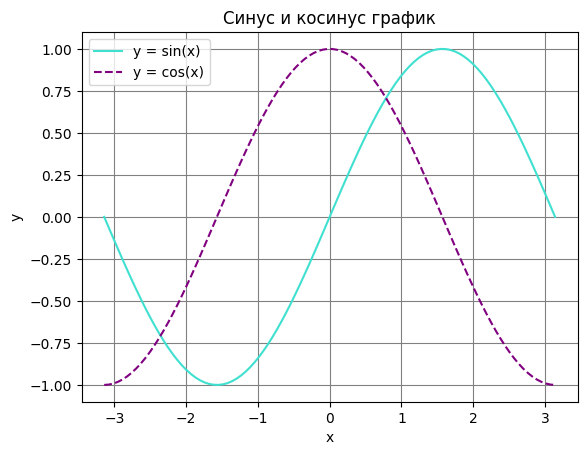

In [23]:
plt.axes().set_facecolor('white')
plt.grid(True, color = 'grey')
plt.plot(x,sy, color = 'turquoise', label = 'y = sin(x)')
plt.plot(x, cy, label = 'y = cos(x)', linestyle='--', color = 'purple')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Синус и косинус график')
plt.legend()
plt.show()

Комментарий к графику:

    *Синус идет как синус*
    
    *Косинус как косинус*

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [24]:
group = pd.pivot_table(data = data, index='status', columns='credit_risk', values='duration', aggfunc='count')
group

credit_risk,bad,good
status,,
... < 0 DM,105,164
... >= 200 DM / salary for at least 1 year,46,348
0<= ... < 200 DM,14,49
no checking account,135,139


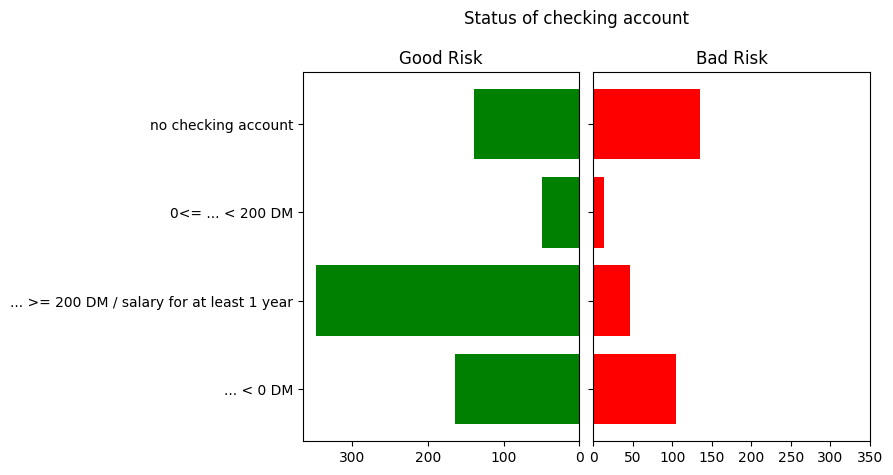

In [25]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, sharey = True)
fig.tight_layout()
axes[0].invert_xaxis() 
axes[0].barh(group.index, group.good, color = 'green')
axes[1].barh(group.index, group.bad, color = 'red')
axes[1].set_xticks([0, 50, 100, 150, 200, 250, 300, 350])
axes[0].set_title('Good Risk')
axes[1].set_title('Bad Risk')
fig.suptitle('Status of checking account')
plt.subplots_adjust(wspace=0.05, top=0.85)
plt.show()

Обращаем внимание, что у кого "... >= 200 DM / salary for at least 1 year", больше шанс того, что одобрят кредит. Тоже самое можно заметить и с "0 <= ... < 200 DM". Если же текущий счет есть, но "... < 0 DM", то кол-во людей, у которых кейс отрицательный, уже выше, однако все равно больше положительных. Если же счета вообще нет, людям реже выдавали кредит  :C

### Задание 8  (0.5 балла)

In [26]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

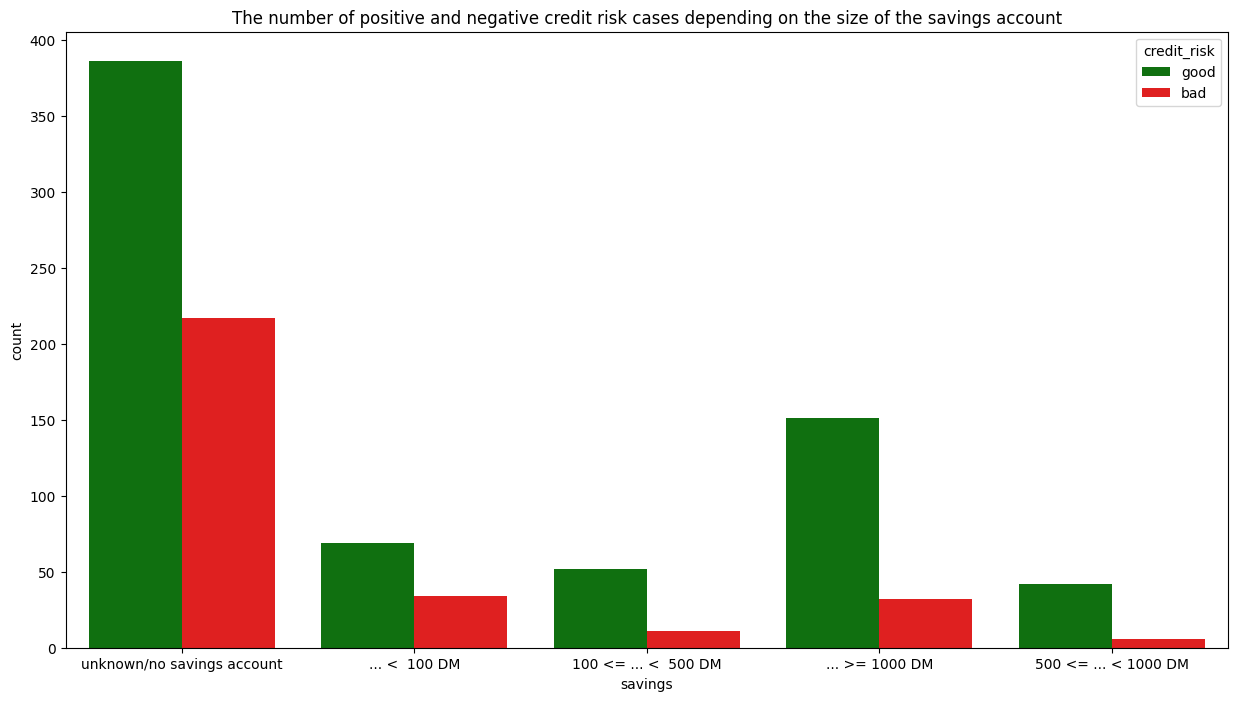

In [27]:
plt.figure(figsize=(15,8))
sns.countplot(data = data, x = 'savings',hue = 'credit_risk',
             palette={"good": "green", "bad": "red"})
plt.title('The number of positive and negative credit risk cases depending on the size of the savings account')
plt.show()

Опять же, видим что чем больше DM на сберегательном, тем чаще людям одобряли кредит. Когда же счета нет или неизвестно, есть ли он, не всем одобряли. Более 1/3 тех, у кого счета нет или неизвестно, есть ли он, осталось без положительного кредитного кейса.

seaborn гораздо проще c точки зрения написания кода, да и по визуализации у него тоже есть хорошие возможности. Однако matplotlib более гибкий, там много всяких плюшек, которые можно вручную самому понастраивать

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

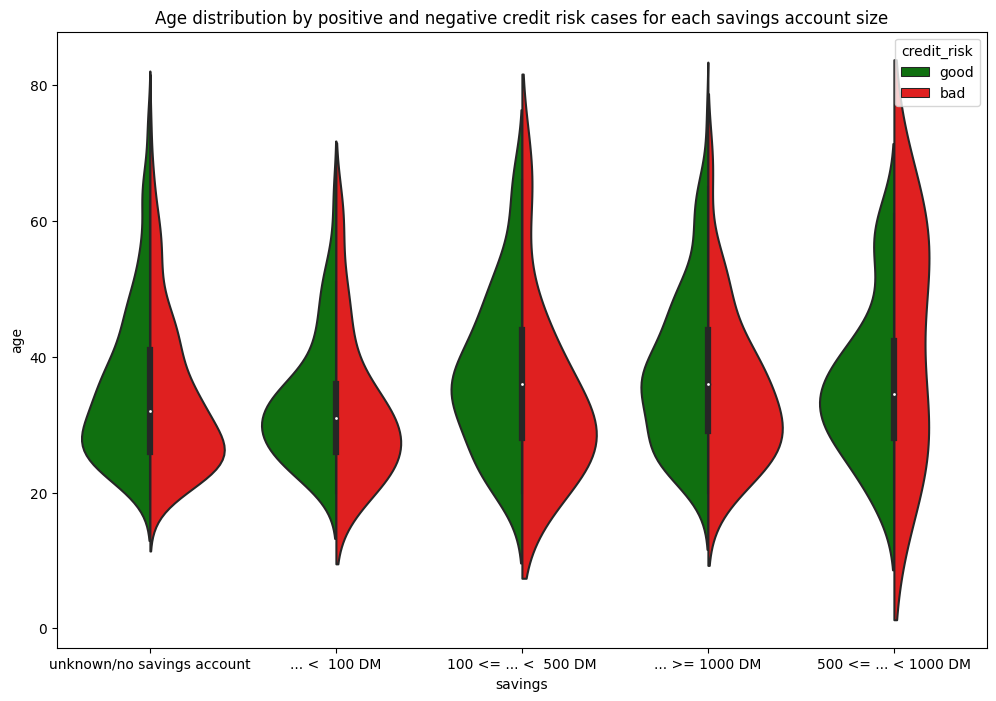

In [28]:
plt.figure(figsize=(12,8))
sns.violinplot(data = data, x = 'savings', hue = 'credit_risk', y = 'age',
               split=True,
               palette={"good": "green", "bad": "red"})
plt.title('Age distribution by positive and negative credit risk cases for each savings account size')
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

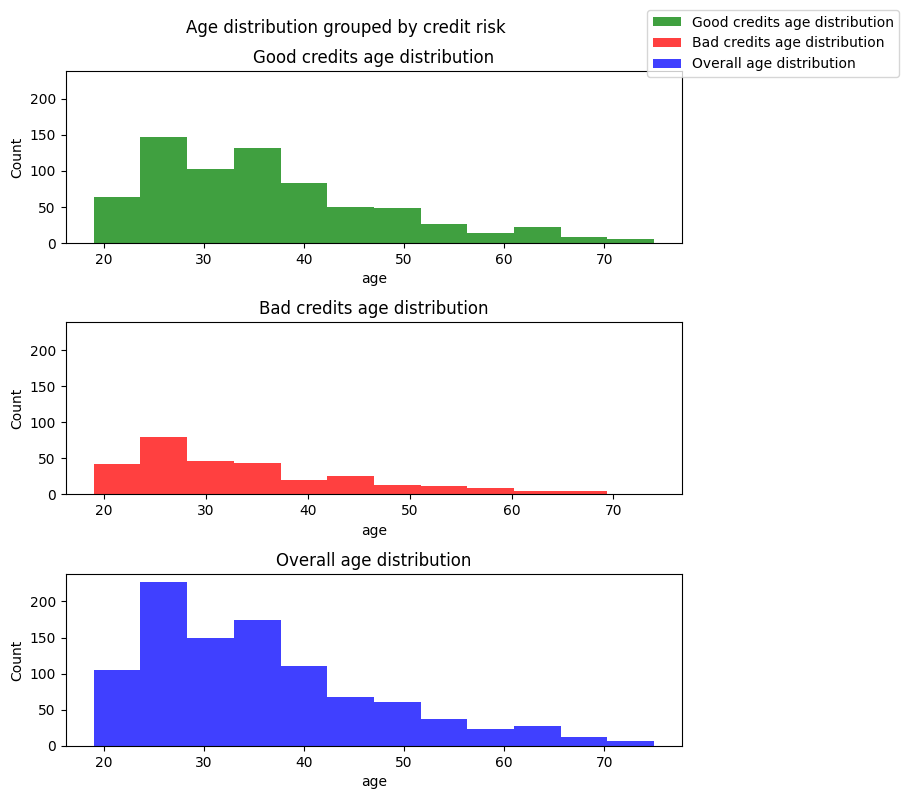

In [29]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, sharey = True, figsize = (7,8))
sns.histplot(data = data[data['credit_risk'] == 'good'], x = 'age', ax = axes[0], 
             bins=12, color = 'green', label = 'Good credits age distribution', linewidth=0 )
sns.histplot(data = data[data['credit_risk'] == 'bad'], x = 'age',ax = axes[1],bins=12,
            color = 'red', label = 'Bad credits age distribution', linewidth=0)
sns.histplot(data = data, x = 'age',ax = axes[2], bins = 12, 
            color = 'blue', label = 'Overall age distribution', linewidth=0)
fig.legend(loc = 1, bbox_to_anchor = (1.3,1))
axes[0].set_title('Good credits age distribution')
axes[1].set_title('Bad credits age distribution')
axes[2].set_title('Overall age distribution')
fig.suptitle('Age distribution grouped by credit risk')
fig.tight_layout(pad=1.0)
plt.show()

Основная аудитория банка в этой сфере - люди возраста от 20-40 лет. Видим, что основная категория тех, кто имеет отрицательный кредитный риск - 25 лет. В целом положительных результатов больше, чем отрицательных

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

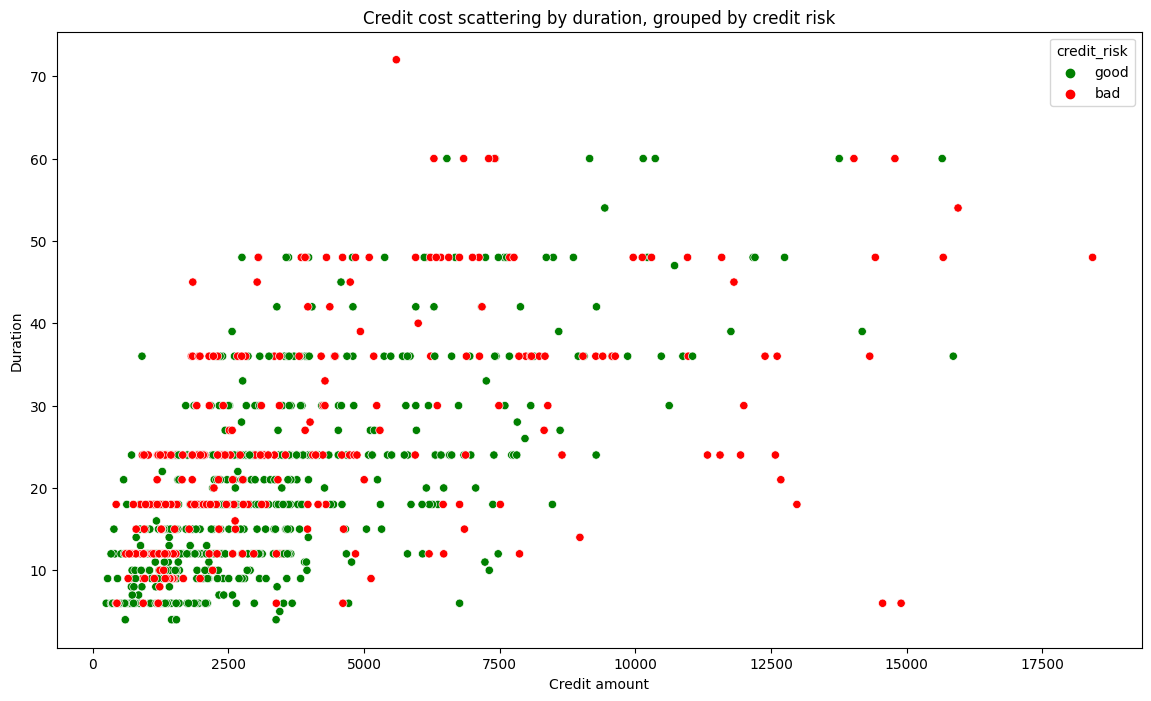

In [30]:
plt.figure(figsize=(14,8))
sns.scatterplot(data = data, x = 'amount', y = 'duration', hue = 'credit_risk', 
                palette={"good": "green", "bad": "red"})
plt.xlabel('Credit amount')
plt.ylabel('Duration')
plt.title('Credit cost scattering by duration, grouped by credit risk')
plt.show()

Видим, что очень много кредитов на сумму до 5000 и длительностью до 40 лет. Много как отрицательных, так и положительных кейсов.
Чем больше сумма и длительность выплаты, тем больше отрицательных кейсов

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

In [31]:
colorways = {'good': 'green', 'bad' : 'red'}

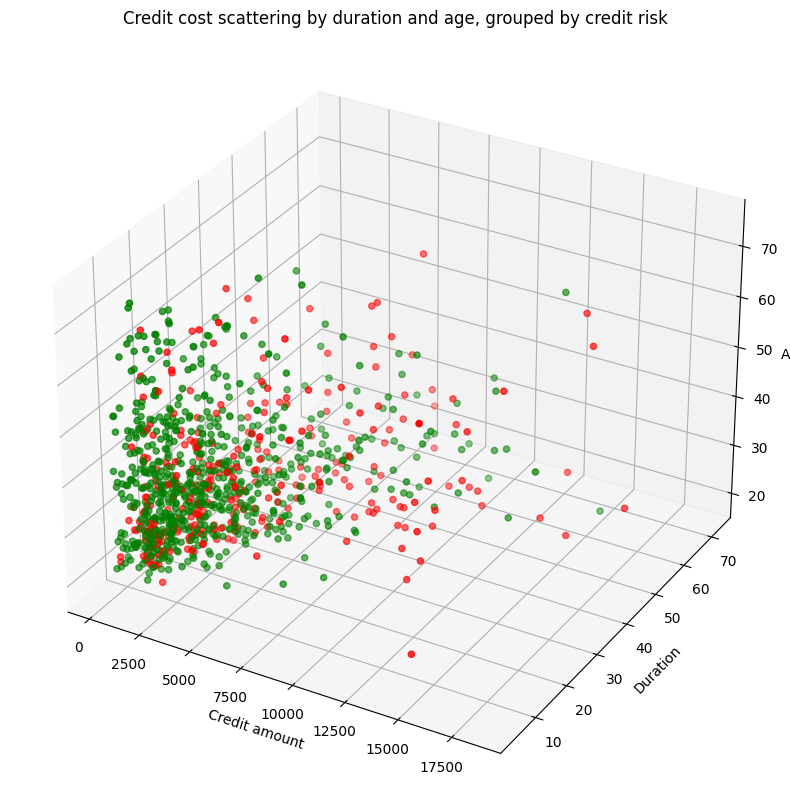

In [32]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection ="3d")
ax.scatter3D(data['amount'], data['duration'], data['age'], c = data['credit_risk'].map(colorways), )
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
ax.set_title('Credit cost scattering by duration and age, grouped by credit risk')
plt.show()

Добавив возраст, мы можем дополнить наш анализ предыдущего тем, что чем старше, тем больше положительных кейсов

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

## Признаки:
### Количественные
- duration
- amount
- age

Имеют тип int64, соотв. и являются количественными

### Бинарные:
- foreign_worker (объяснение: no -> false -> 0, yes -> true -> 1)
- telephone (объяснение: no -> false -> 0, yes -> true -> 1)
- credit_risk (объяснение: bad -> false -> 0, good -> true -> 1)

### Порядковые:
- status (можно упорядочить и сравнить, чего нельзя сделать с категориальными, предположим, что для банка лучше же, чтобы сбережений было больше, чем их не было бы)
- employment_duration (можно упорядочить и сравнить, чего нельзя сделать с категориальными, предположим, что для банка лучше же, чтобы опыт работы был как можно больше)
- savings (можно упорядочить и сравнить, чего нельзя сделать с категориальными, предположим, что для банка лучше же, чтобы на счете было больше, чем их не было бы)
- present_residence (есть интервальный порядок кол-ва лет)
- property (так же можно упорядочить, что лучше)
- number_credits (есть интервальный порядок кол-ва существующих кредитов в банке)
- job (реально сравнить, профи лучше чем непрофи и т.д.)
- installment_rate (ставка взноса в процентах от располагаемого дохода разделена на интервалы по порядку)
- people_liable (скорее всего, ранее признак был целочисленным, впоследствии его оформили в виде порядка из 2 значений)

### Категориальные:
- purpose (цели могут различаться в стоимостях в независимости от категории)
- personal_status_sex (пол + семейный статус, нечего сравнивать, как категории)
- other_debtors (3 разные категории - и не сравнить)
- other_installment_plans (несравнимый признак)
- housing (несравнимый признак)
- credit_history (у каждого человека своя кредитная история, соотв. они разбиваются на разные категории


In [33]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [34]:
df = data.copy()

In [35]:
#Замена бинарных признаков

df['foreign_worker'] = df['foreign_worker'].map({'yes':1, 'no':0})
df['credit_risk'] = df['credit_risk'].map({'good':1, 'bad':0})
df['telephone'] = df['telephone'].map({'yes (under customer name)':1, 'no':0})

In [36]:
# Замена порядковых признаков
df['status'] = df['status'].map({
    'no checking account': 0,
    '... < 0 DM': 1,
    '0<= ... < 200 DM':2,
    '... >= 200 DM / salary for at least 1 year':3
})

In [37]:
df.employment_duration.unique()

array(['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', 'unemployed',
       '>= 7 yrs'], dtype=object)

In [38]:

df['employment_duration'] = df['employment_duration'].map({
    'unemployed': 0,
    '< 1 yr': 1,
    '1 <= ... < 4 yrs':2,
    '4 <= ... < 7 yrs':3,
    '>= 7 yrs':4
})

In [39]:
df.savings.unique()

array(['unknown/no savings account', '... <  100 DM',
       '100 <= ... <  500 DM', '... >= 1000 DM', '500 <= ... < 1000 DM'],
      dtype=object)

In [40]:
df['savings'] = df['savings'].map({
    'unknown/no savings account': 0,
    '... <  100 DM': 1,
    '100 <= ... <  500 DM':2,
    '500 <= ... < 1000 DM':3,
    '... >= 1000 DM':4
})

In [41]:
df.present_residence.unique()

array(['>= 7 yrs', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '< 1 yr'],
      dtype=object)

In [42]:
df['present_residence'] = df['present_residence'].map({
    '< 1 yr': 0,
    '1 <= ... < 4 yrs': 1,
    '4 <= ... < 7 yrs':2,
    '>= 7 yrs':3
})

In [43]:
df.property.unique()

array(['car or other', 'unknown / no property',
       'building soc. savings agr./life insurance', 'real estate'],
      dtype=object)

In [44]:
df['property'] = df['property'].map({
    'unknown / no property': 0,
    'car or other': 1,
    'building soc. savings agr./life insurance':2,
    'real estate':3
})

In [45]:
df.number_credits.unique()

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

In [46]:
df['number_credits'] = df['number_credits'].map({
    '1':0,
    '2-3':1,
    '4-5':2,
    '>= 6':3
})

In [47]:
df.job.unique()

array(['skilled employee/official', 'unskilled - resident',
       'unemployed/unskilled - non-resident',
       'manager/self-empl./highly qualif. employee'], dtype=object)

In [48]:
df['job'] = df['job'].map({
    'unemployed/unskilled - non-resident':0,
    'unskilled - resident':1,
    'skilled employee/official':2,
    'manager/self-empl./highly qualif. employee':3
})

In [49]:
df.installment_rate.value_counts()

< 20              476
25 <= ... < 35    231
20 <= ... < 25    157
>= 35             136
Name: installment_rate, dtype: int64

In [50]:
df['installment_rate'] = df['installment_rate'].map({
    '>= 35':0,
    '25 <= ... < 35':1,
    '20 <= ... < 25':2,
    '< 20':3
})

In [51]:
df.people_liable.unique()

array(['0 to 2', '3 or more'], dtype=object)

In [52]:
df['people_liable'] = df['people_liable'].map({'0 to 2':0, '3 or more':1})

In [53]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,all credits at this bank paid back duly,car (used),1049,0,1,3,female : non-single or male : single,none,...,1,21,none,for free,0,2,0,0,0,1
1,0,9,all credits at this bank paid back duly,others,2799,0,2,1,male : married/widowed,none,...,0,36,none,for free,1,2,1,0,0,1
2,1,12,no credits taken/all credits paid back duly,retraining,841,1,3,1,female : non-single or male : single,none,...,0,23,none,for free,0,1,0,0,0,1
3,0,12,all credits at this bank paid back duly,others,2122,0,2,2,male : married/widowed,none,...,0,39,none,for free,1,1,1,0,1,1
4,0,12,all credits at this bank paid back duly,others,2171,0,2,3,male : married/widowed,none,...,1,38,bank,rent,1,1,0,0,1,1


In [54]:
df2 = df._get_numeric_data() # убираем категориальные 
df2

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,property,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,1049,0,1,3,3,1,21,0,2,0,0,0,1
1,0,9,2799,0,2,1,1,0,36,1,2,1,0,0,1
2,1,12,841,1,3,1,3,0,23,0,1,0,0,0,1
3,0,12,2122,0,2,2,1,0,39,1,1,1,0,1,1
4,0,12,2171,0,2,3,3,1,38,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,1987,0,2,1,3,0,21,0,1,1,0,0,0
996,0,24,2303,0,4,3,0,0,45,0,2,0,0,0,0
997,3,21,12680,4,4,3,3,3,30,0,3,0,1,0,0
998,1,12,6468,4,0,1,0,3,52,0,3,0,1,0,0


In [55]:
df2.isnull().any() # проверим, не потеряли ли мы чего-то

status                 False
duration               False
amount                 False
savings                False
employment_duration    False
installment_rate       False
present_residence      False
property               False
age                    False
number_credits         False
job                    False
people_liable          False
telephone              False
foreign_worker         False
credit_risk            False
dtype: bool

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [56]:
from sklearn import preprocessing
normalizer = preprocessing.StandardScaler()

In [57]:
amount = df2['amount'].values.reshape(-1,1)

In [69]:
amount = normalizer.fit_transform(amount)
amount #стандартизировали сумму, чтобы проще было работать в формуле с ней в дальнейшем :)

array([[-7.87656920e-01],
       [-1.67384291e-01],
       [-8.61380753e-01],
       [-4.07341188e-01],
       [-3.89973554e-01],
       [-3.65162649e-01],
       [ 4.49261693e-02],
       [-6.77071172e-01],
       [-7.70289287e-01],
       [ 1.72525110e-01],
       [ 2.24628011e-01],
       [ 1.03346352e+00],
       [-4.65824036e-01],
       [ 1.52790942e+00],
       [-4.73267307e-01],
       [-2.21259399e-01],
       [ 2.36679022e-01],
       [-2.06455086e-02],
       [-3.31136265e-01],
       [ 1.40243712e+00],
       [ 1.43460907e-01],
       [-5.21908024e-02],
       [-3.14477514e-01],
       [-6.54741357e-01],
       [ 5.12080070e-01],
       [ 5.31574352e-01],
       [-9.28370197e-01],
       [-7.50440563e-01],
       [ 1.00927927e-01],
       [ 5.40435390e-01],
       [-9.01160432e-02],
       [ 9.34846552e-02],
       [ 1.18481004e+00],
       [-6.71754549e-01],
       [-5.49472231e-01],
       [-8.54646364e-01],
       [-6.29576010e-01],
       [-4.73976191e-01],
       [ 3.7

In [59]:
df2['amount'] = amount
df2 

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,property,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,-0.787657,0,1,3,3,1,21,0,2,0,0,0,1
1,0,9,-0.167384,0,2,1,1,0,36,1,2,1,0,0,1
2,1,12,-0.861381,1,3,1,3,0,23,0,1,0,0,0,1
3,0,12,-0.407341,0,2,2,1,0,39,1,1,1,0,1,1
4,0,12,-0.389974,0,2,3,3,1,38,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,-0.455191,0,2,1,3,0,21,0,1,1,0,0,0
996,0,24,-0.343187,0,4,3,0,0,45,0,2,0,0,0,0
997,3,21,3.334852,4,4,3,3,3,30,0,3,0,1,0,0
998,1,12,1.133062,4,0,1,0,3,52,0,3,0,1,0,0


In [60]:
def predict(Xtest: np.array) -> np.array:
    
    # Cформируем собственную формулу с весами, заданными нами из однофакторного анализа
    # 0.02 - обычный фактор, получил я его методом 1 / 5 (макс колво интервалов в порядковых),
    # чтобы впоследствии давал единичку как максимум
    
    Xtest[:,0] = 0.03 * Xtest[:,0] #наличие статуса важно, поэтому дали еще 0.01
    Xtest[:, 1] = -0.1 * Xtest[:, 1] #чем больше длительность, тем меньше вероятность что одобрят (выявили из графика)
    Xtest[:, 3] = 0.02 * Xtest[:, 3] 
    Xtest[:, 4] = 0.02 * Xtest[:, 4]
    Xtest[:, 5] = 0.02 * Xtest[:, 5]
    Xtest[:, 6] = 0.02 * Xtest[:, 6]
    Xtest[:, 7] = 0.02 * Xtest[:, 7]
    Xtest[:, 8] = 0.1 * Xtest[:, 8] # возраст очень сильно влияет, поэтому дали 0.1
    Xtest[:, 9] = 0.02 * Xtest[:, 9]
    Xtest[:, 10] = 0.02 * Xtest[:, 10]
    Xtest[:, 11] = 0.02 * Xtest[:, 11]
    Xtest[:, 12] = 0.02 * Xtest[:, 12]
    Xtest[:, 13] = 0.02 * Xtest[:, 13]
    return np.array(np.sum(Xtest, axis=1) > 0).astype(int)

    


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df2.drop('credit_risk', 1).values
y = df2['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
accuracy_score(y_test, predict(X_test))

/var/folders/dy/v6f6m6ms26jc4qm36n5qy19h0000gn/T/ipykernel_25467/2511602501.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df2.drop('credit_risk', 1).values


0.692

### Ниже рассчитывал веса через тренировочную выборку

In [62]:
X_train

array([[ 3.        , 15.        ,  0.02543189, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        , 24.        ,  1.11569395, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.        , 20.        ,  0.35470804, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , 24.        , -0.34318728, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        , 24.        ,  0.64924893, ...,  0.        ,
         1.        ,  0.        ],
       [ 3.        , 22.        , -0.21133504, ...,  0.        ,
         0.        ,  0.        ]])

In [63]:
X_train[:,0] = 0.03 * X_train[:,0]
X_train[:, 1] = -0.1 * X_train[:, 1]
X_train[:, 3] = 0.02 * X_train[:, 3]
X_train[:, 4] = 0.02 * X_train[:, 4]
X_train[:, 5] = 0.02 * X_train[:, 5]
X_train[:, 6] = 0.02 * X_train[:, 6]
X_train[:, 7] = 0.02 * X_train[:, 7]
X_train[:, 8] = 0.1 * X_train[:, 8]
X_train[:, 9] = 0.02 * X_train[:, 9]
X_train[:, 10] = 0.02 * X_train[:, 10]
X_train[:, 11] = 0.02 * X_train[:, 11]
X_train[:, 12] = 0.02 * X_train[:, 12]
X_train[:, 13] = 0.02 * X_train[:, 13]


In [64]:
ynew = np.array(np.sum(X_train, axis=1) > 0).astype(int)

In [65]:
accuracy_score(ynew, y_train)

0.7146666666666667